In [528]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      サポートベクターTo選ぶための閾値
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : of the following form. ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  of the following form. ndarray, shape(n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  of the following form. ndarray, shape(n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  of the following form. ndarray, shape(n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter=100, lr=0.01,
                 kernel='linear', ganma=1, d=1, theta=0, threshold=1e-5,
                 verbose=False):

        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.d = d
        self.theta = theta

    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        X : ndarray of the following form, shape (n_samples,n_features)
        Training data features

        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2

        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d


    def _lamda_update(self,X,y):

        for i in range(len(X)):
            total = 0
            for j in range(len(X)):
                total += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j])

            self.lamda[i] += self.lr*(1-total)

            if self.lamda[i] < 0:
                self.lamda[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train an SVM classifier.
        If the verification data is input, the accuracy against it is also calculated for each iteration

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form.
            Training data features
        y : ndarray, shape (n_samples, ) of the following form.
            Training data Correct answer value
        X_val : ndarray, shape (n_samples, n_features) of the following form.
            Features of verification data
        y_val : ndarray, shape (n_samples, ) of the following form.
            Correct value of verification data
        """

        # Set the initial value of Lamda
        self.lamda = np.random.rand(len(X))

        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0], -1, 1)

        for i in range(self.iter):
            self._lamda_update(X,y)

            # 0utputs the learning process when verbose is set to true.

            if self.verbose:
                print('iter_n:', i,'lamda:', self.lamda)

        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]

    def predict(self, X):
        """
        Use SVM classifier to estimate labels

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form.
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form.
            Estimated result by SVM classifier
        """

        y_pred =  np.zeros(len(X))

        for i in range(len(X)):
            total = 0
            for j in range(self.n_support_vectors):
                total += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])

            if total >= 0:
                y_pred[i] = self.ylabel[1]
            else:
                y_pred[i] = self.ylabel[0]

        return y_pred

In [529]:
class ScratchSVMClassifierNumpy():
    """
    Scratch implementation of classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    Ir : float
      learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for selecting support vectors
    verbose : bool
      true if you want to output the learning process.

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : ndarray, shape (n _ support _ vectors,) of the following form
      Support vectors index
    self.X_sv : ndarray, shape(n_support_vectors, n _ features) of the following form
      Support vectors features
    self.lam_sv : ndarray, shape(n_support_vectors, 1) of the following form
      self.Iam sv

    ----------
    X = ndarray of the following form, shape (n_samples, n_features)
        training data features
    """
    def __init__(self, num_iter=100, lr=0.01, kernel='linear', ganma=1, d=1, theta=0, threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.d = d
        self.theta = theta

    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples,n_features)
        Training data features

        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2

        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d

    def _lamda_update(self,X,y):

        for i in range(len(X)):
            self.lamda[i] += self.lr*(1-np.dot(self.lamda*y[i]*y.T, self._kernel(X[i],X)))
            self.lamda = np.where(self.lamda >= 0, self.lamda, 0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train an SVM classifier.
        If verification data is input, the accuracy against it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form.
            Training data features
        y : ndarray, shape (n_samples, ) of the following form.
            Training data Correct answer value
        X_val : ndarray, shape (n_samples, n_features) of the following form.
            Features of validation data
        y_val : ndarray, shape (n_samples, ) of the following form.
            Correct value of validation data
        """
        # Set the initial value of Lamda
        self.lamda = np.random.rand(len(X))

        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0], -1, 1)

        for i in range(self.iter):
            self._lamda_update(X,y)

            # 0utputs the learning process when verbose is set to true.

            if self.verbose:
                print()

        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]

    def predict(self, X):
        """
        Use SVM classifier to estimate labels

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form.
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form.
            Estimated result by SVM classifier
        """

        y_pred =  np.dot(self.lam_sv*self.y_sv,self._kernel(X, self.X_sv).T)

        return np.where(y_pred >= 0, self.ylabel[1], self.ylabel[0])

# Problem 1

In [530]:
import numpy as np
import matplotlib.pyplot as plt

In [531]:
np.random.seed(seed=0)

# n _ samples = 500
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8],[0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int64)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

In [532]:
# Test with a small sample
x = sample1_X[20:40]
y = sample1_y[20:40]
print(x)
print(y)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [533]:
# Generate a random number from 0 to 1
lamda = np.random.rand(len(x))
lamda.reshape(-1,1)

array([[0.52459262],
       [0.44201532],
       [0.85263492],
       [0.43343897],
       [0.82687037],
       [0.50934207],
       [0.08637698],
       [0.66003986],
       [0.20659461],
       [0.84727532],
       [0.68135913],
       [0.17836735],
       [0.06985902],
       [0.00968817],
       [0.89204966],
       [0.13346521],
       [0.77919197],
       [0.92516343],
       [0.71517875],
       [0.49081861]])

In [534]:
# Manual Iteration

for _ in range(num_iter):
    for i in range(len(x)):
        total = 0
        for j in range(len(x)):
            total += lamda[j]*y[i]*y[j]*np.dot(x[i],x[j])

        lamda[i] += 0.01*(1-total)

        if lamda[i] < 0:
            lamda[i] = 0

print('lamda:\n', lamda.reshape(-1,1))

lamda:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05094991]
 [0.1875896 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.3011963 ]
 [0.        ]
 [0.        ]]


In [535]:
num_iter = 100
for _ in range(num_iter):
    for i in range(len(x)):
        total = 0
        for j in range(len(x)):
            total += lamda[j]*y[i]*y[j]*np.dot(x[i],x[j])
        lamda[i] += 0.01*(1-total)

        if lamda[i] < 0:
            lamda[i] = 0
print('lamda:\n', lamda.reshape(-1,1))

lamda:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.25954724]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.31938548]
 [0.        ]
 [0.        ]]


In [536]:
# Utilize numpy
xx = np.array([[1,2],
               [1,2],
               [2,4],
               [2,4]])

np.dot(xx[1], xx.T)

array([ 5,  5, 10, 10])

In [537]:
a = np.dot(x[0], x.T)
print(a)

[ 6.56280495 -0.57281068 -4.06543221 -3.12148507 -4.18407598 -4.15203376
 -2.84465992 -6.29616316 -0.79538197  1.95579473 -6.64117124 -6.83395278
  6.32326249  5.10627053  2.72463005  8.85276001  8.01250064  0.5918156
  7.06019559 -1.13884843]


In [538]:
b = lamda*y[0]*y
print(b)

[ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.25954724  0.          0.          0.          0.         -0.31938548
  0.          0.        ]


In [539]:
a*b

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.64118531,  0.        ,  0.        ,
        0.        ,  0.        , -0.18901731,  0.        , -0.        ])

In [540]:
np.sum(a*b)

1.4521680052836201

In [541]:
np.dot(a,b)

1.4521680052836201

In [542]:
c = np.dot(x,x.T)
print(c.shape)

(20, 20)


In [543]:
d = lamda*y*y.T
print(d.shape)

(20,)


In [544]:
np.dot(c,d)

array([ 1.83020262,  1.79283084,  0.7698743 ,  0.38747016,  0.52534803,
       -0.33831603,  1.73829995, -1.91910517,  2.91536492, -2.41064141,
       -0.8186395 , -2.57105645,  2.52767933, -0.45434799, -0.56873096,
        2.09180468,  2.63558127,  2.24006453,  2.25055692, -3.08438428])

# Problem 2

In [545]:
# Extract samples with lamda greater than a threshold value
threshold = 1e-5
spt_vec = x[lamda > threshold]
print(spt_vec)

[[2.4982956  0.72754957]
 [0.31731679 2.22551981]]


In [546]:
# Get the index
spt_index = np.where(lamda > threshold)
print(spt_index)

(array([12, 17]),)


In [547]:
# Get the lamda and label values of the support vector
spt_lamda = lamda[lamda > 0]
spt_y = y[lamda > 0]
print(spt_lamda)
print(spt_y)

[0.25954724 0.31938548]
[-1  1]


# Problem 3

In [548]:
# test data
x_test = x[0:5]
x_test

array([[ 2.55988095, -0.09906791],
       [-0.14205902,  2.11124362],
       [-1.50642737,  2.11125339],
       [-1.16513883,  1.40174924],
       [-1.5615169 ,  1.88535921]])

In [549]:
for i in range(len(x_test)):
    total = 0
    for j in range(len(spt_vec)):
        total += spt_lamda[j]*spt_y[j]*np.dot(x_test[i],spt_vec[j])

    if total > 0:
        print('f(x):{:.1f}, class:{}'.format(total,1))
    else:
        print('f(x):{:.1f}, class:{}'.format(total,-1))

f(x):-1.5, class:-1
f(x):1.2, class:1
f(x):1.9, class:1
f(x):1.4, class:1
f(x):1.8, class:1


# Problem 4

In [550]:
np.random.seed(seed=0)

n_samples = 500


f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8],[0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2)))*(-1))).astype(np.int64)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

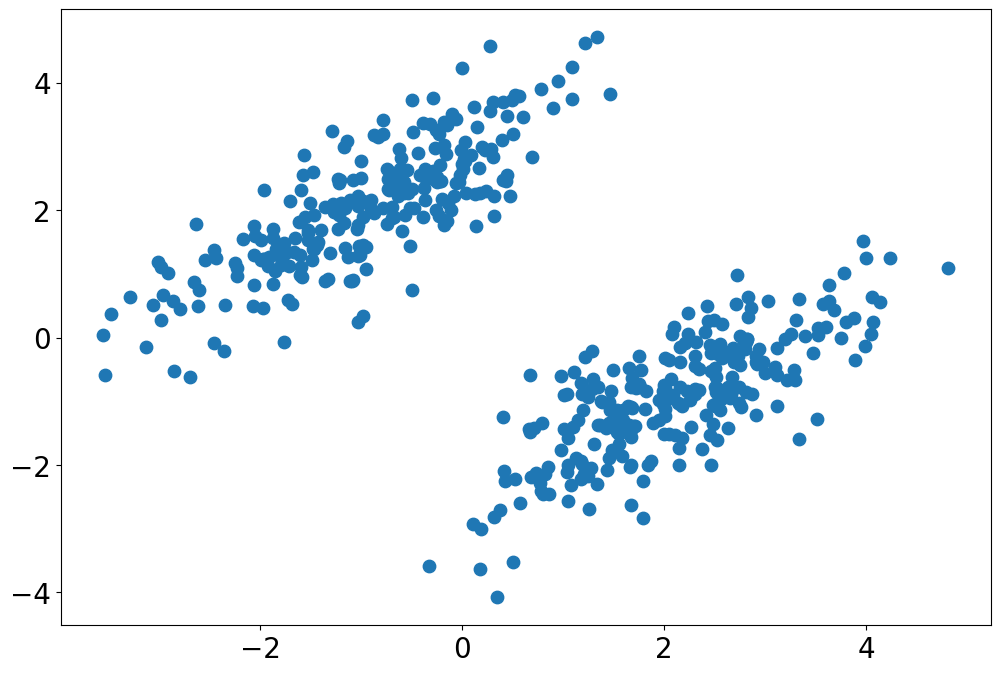

In [551]:
# Visualizing Simple Data 1
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(sample1_X[:,0], sample1_X[:,1], s=80);

In [552]:
from sklearn.model_selection import train_test_split
X = sample1_X
y = sample1_y

X_train1, X_valid1, y_train1, y_valid1 = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:', X_train1.shape)
print('y_train.shape:', y_train1.shape)
print('X_valid.shape:', X_valid1.shape)
print('y_valid.shape:', y_valid1.shape)

X_train.shape: (400, 2)
y_train.shape: (400,)
X_valid.shape: (100, 2)
y_valid.shape: (100,)


In [553]:
# Train and estimate with scratch model
clf1 = ScratchSVMClassifier(num_iter=100, lr=0.5,)

clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_valid1)

In [554]:
Show = False

if Show:
    print('PRED:', y_pred1)
    print('VALI:', y_valid1)

In [555]:
# EValuation Index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid1, y_pred1)
precision = precision_score(y_valid1, y_pred1)
recall = recall_score(y_valid1,y_pred1)
f1 = f1_score(y_valid1, y_pred1)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [556]:
# Train and estimate with sklearn model
from sklearn.svm import SVC
clf_sk = SVC()

clf_sk.fit(X_train1,y_train1)

y_pred_sk = clf_sk.predict(X_valid1)

In [557]:
accuracy = accuracy_score(y_valid1, y_pred_sk)
precision = precision_score(y_valid1, y_pred_sk)
recall = recall_score(y_valid1, y_pred_sk)
f1 = f1_score(y_valid1, y_pred_sk)

print('accuracy' , accuracy)
print('precision', precision)
print('recall' , recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


# Problem 5

In [558]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y, model, step=0.01,
                    title = 'decision region',
                    xlabel = 'xlabel',
                    ylabel = 'ylabel',
                    target_names = ['versicolor','virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5,
                                             np.max(X[:,0])+0.5, step),
                                   np.arange(np.min(X[:,1])-0.5,
                                             np.max(X[:,1])+0.5, step))


    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=5, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0],
                    X[y==target][:,1],
                    s=80,
                    color=scatter_color[i],
                    label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:, 0],model.X_sv[:,1],color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()

Number of Support_vector: 2


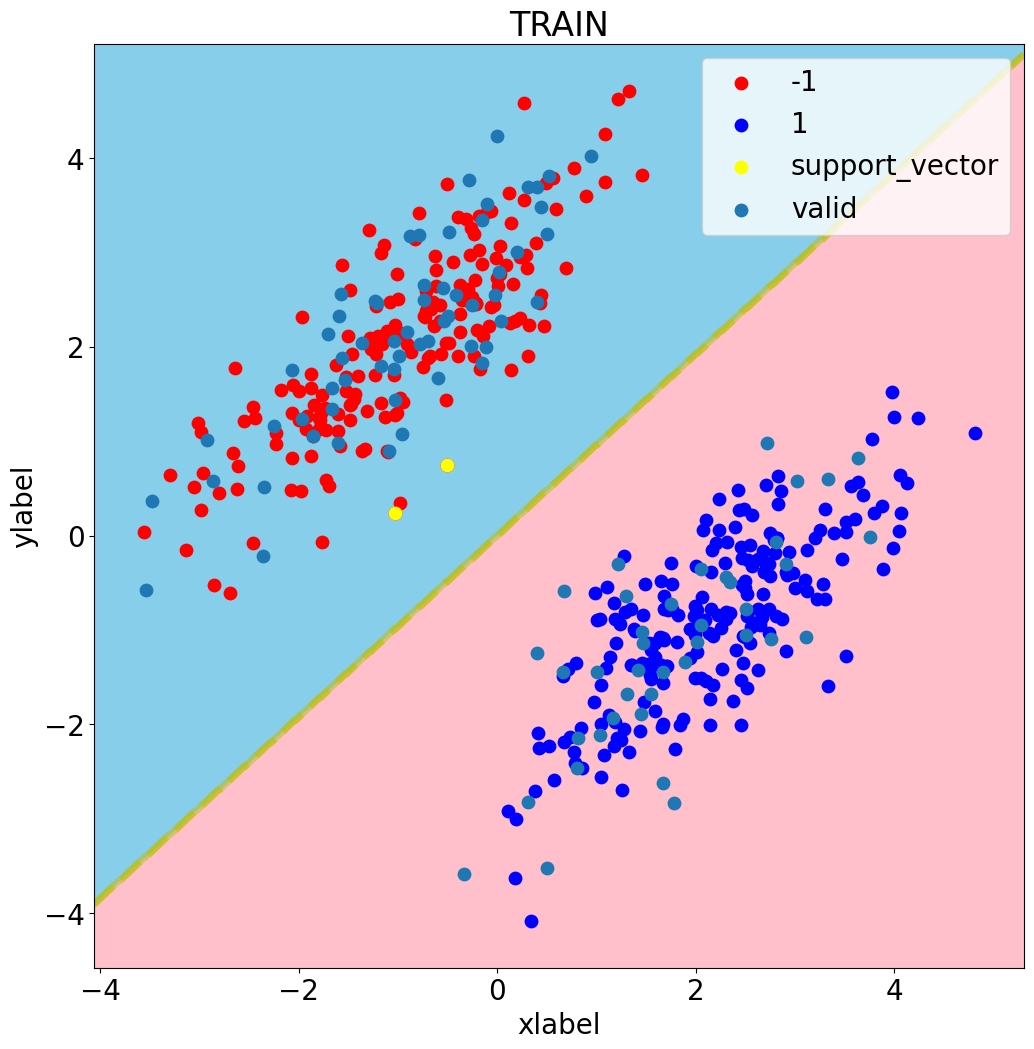

In [559]:
fix,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vector:', clf1.n_support_vectors)
decision_region(X_train1, y_train1, clf1, title='TRAIN', target_names=['-1', '1'])
plt.scatter(X_valid1[:, 0], X_valid1[:,1], s=80, label='valid')
plt.legend();

In [560]:
clfnp = ScratchSVMClassifierNumpy(num_iter = 100,lr=0.01, threshold=1e-5)
clfnp.fit(X_train1, y_train1)
y_pred_clfnp = clfnp.predict(X_valid1)

accuracy = accuracy_score(y_valid1, y_pred_clfnp)
precision = precision_score(y_valid1, y_pred_clfnp)
recall = recall_score(y_valid1, y_pred_clfnp)
f1 = f1_score(y_valid1, y_pred_clfnp)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


Number of Support_vactor: 9


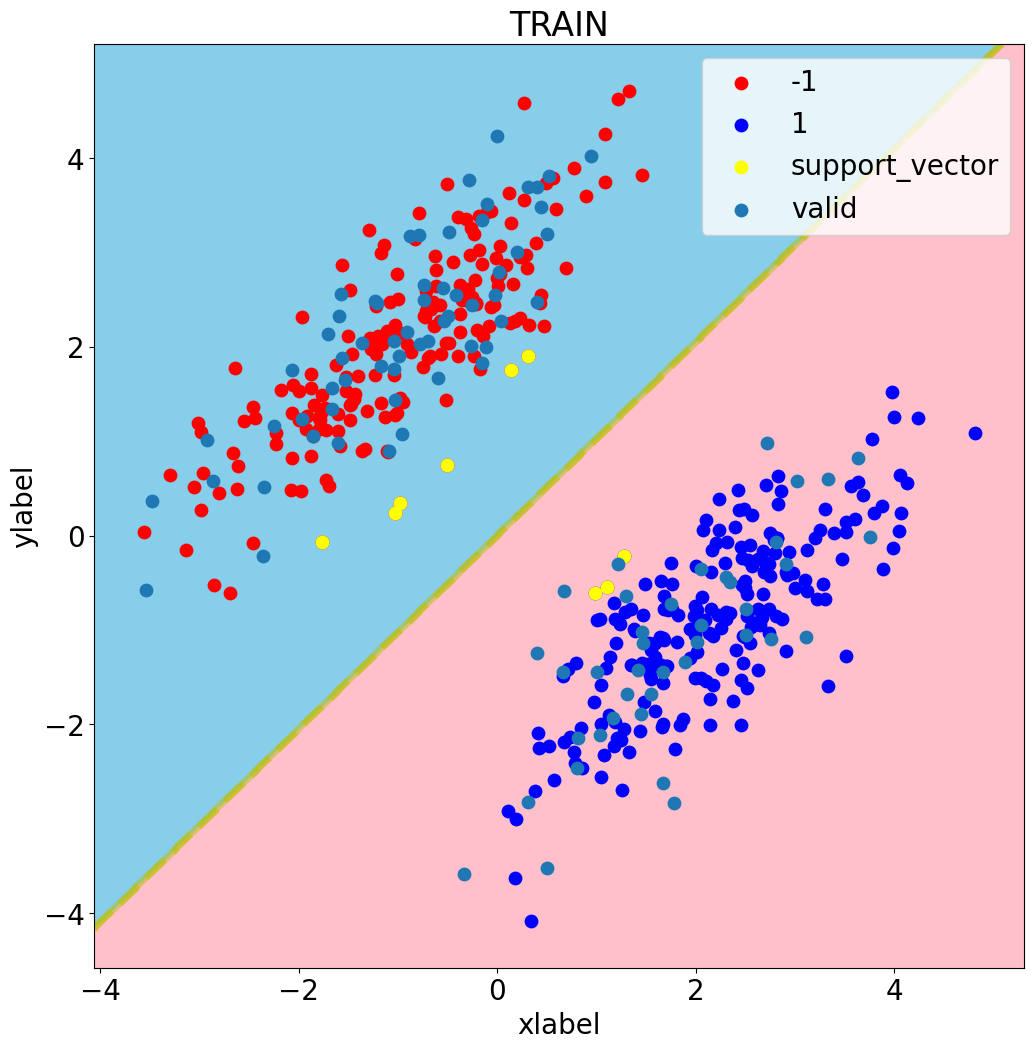

In [561]:
fit, ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print( 'Number of Support_vactor:', clfnp.n_support_vectors)
decision_region(X_train1, y_train1 , clfnp, title='TRAIN' ,target_names=['-1', '1'])
plt.scatter(X_valid1[:, 0], X_valid1[:,1], s=80, label='valid')
plt.legend();

# Problem 6

In [562]:
clf4 = ScratchSVMClassifierNumpy(kernel='polly', d=2)
clf4.fit(X_train1, y_train1)
y_pred4 = clf4.predict(X_valid1)

Number of Support_vactor: 9


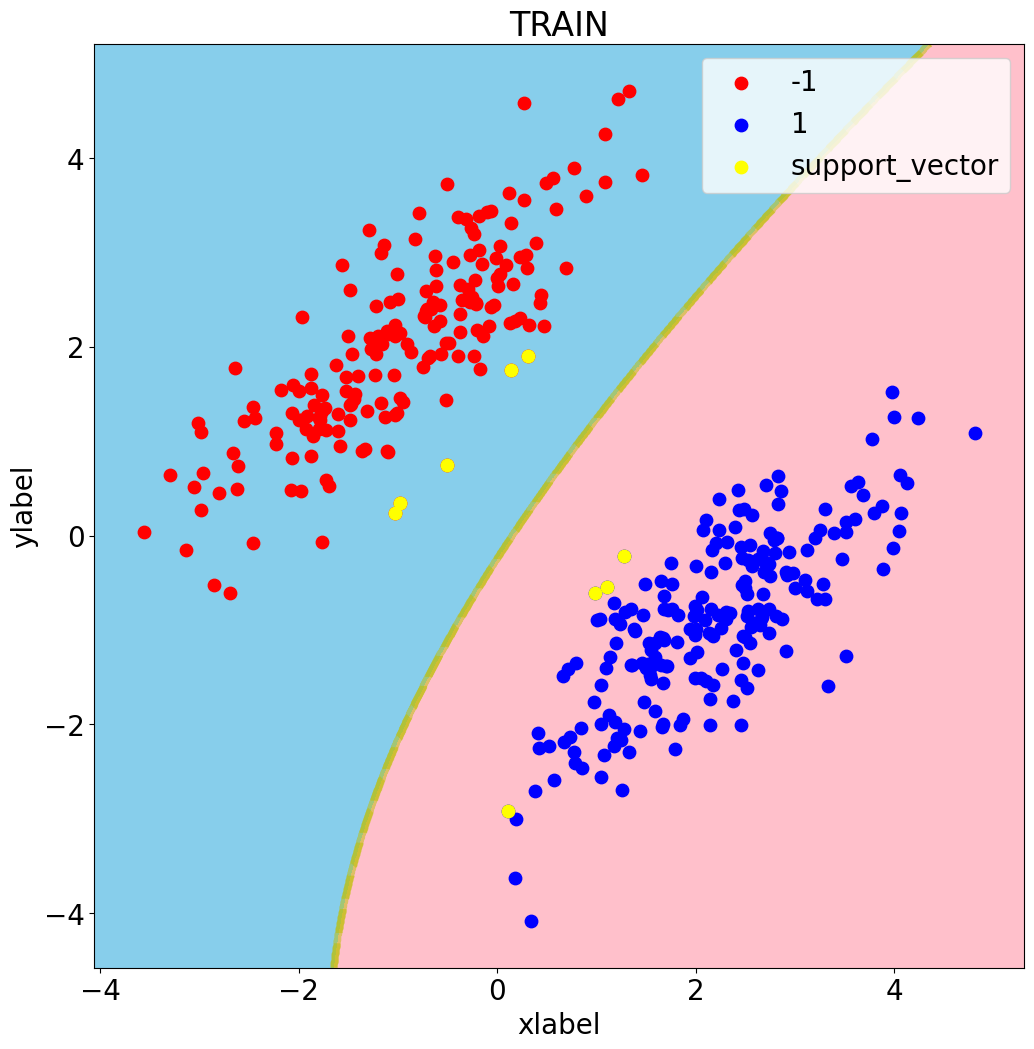

In [563]:
fit, ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print( 'Number of Support_vactor:', clf4.n_support_vectors)
decision_region(X_train1, y_train1 , clf4, title='TRAIN' ,target_names=['-1', '1'])
#plt.scatter(X_valid1[:, 0], X_valid1[:,1], s=80, label='valid')
plt.legend();

In [564]:
# Checking polynomial kernels
x = np.array([[2,2],
              [2,2]])
y =  np.array([[3,8],
               [9,1]])

print('linear:\n', np.dot(x,y))
print('polly:\n', (np.dot(x,y)+1)**2)

linear:
 [[24 18]
 [24 18]]
polly:
 [[625 361]
 [625 361]]


In [565]:
# Circle class 1 dataset
n = 300

rs = np.random.random(n)
r = 1.0
X1 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y1 = [-1 for _ in range(n)]

rs = np.random.random(n)
r = 2.0
X2 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y2 = [1 for _ in range(n)]

X = np.r_[X1, X2]
y = np.r_[Y1, Y2]

In [566]:
X_train3, X_valid3, y_train3, y_valid3 = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:', X_train3.shape)
print('y_train.shape:', y_train3.shape)
print('X_valid.shape:', X_valid3.shape)
print('y_valid.shape:', y_valid3.shape)

X_train.shape: (480, 2)
y_train.shape: (480,)
X_valid.shape: (120, 2)
y_valid.shape: (120,)


In [567]:
clf3 = ScratchSVMClassifierNumpy(kernel='polly', d=2)
clf3.fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_valid3)

Number of Support_vactor: 25


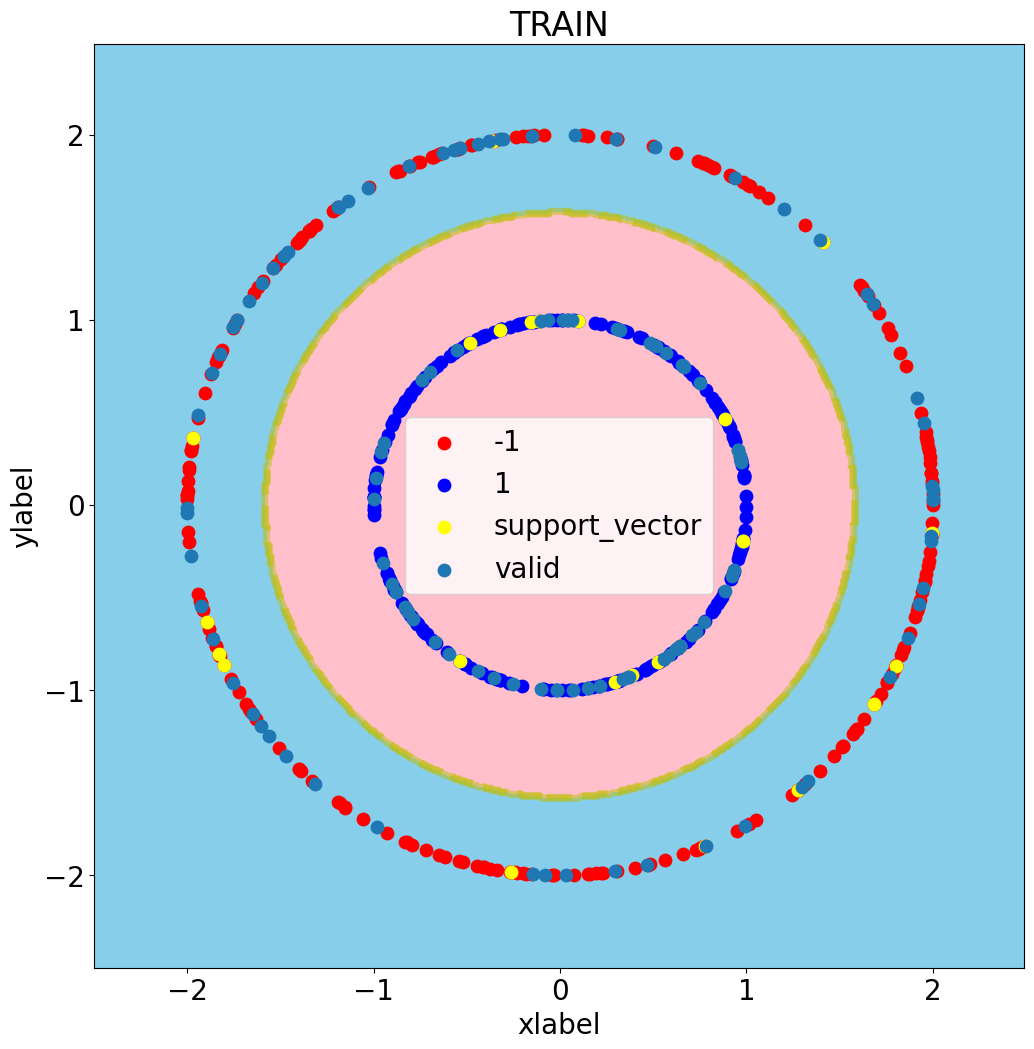

In [568]:
fit, ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print( 'Number of Support_vactor:', clf3.n_support_vectors)
decision_region(X_train3, y_train3 , clf3, title='TRAIN' ,target_names=['-1', '1'])
plt.scatter(X_valid3[:, 0], X_valid3[:,1], s=80, label='valid')
plt.legend();

In [569]:
# Compute feature vectors for polynomial kernels
from scipy.special import comb

def poly_feature(x, d):
    z = np.zeros((x.shape[0], d+1))

    for i in range(d+1):
        # binomial theorem
        a = np.sqrt(comb(d, i, exact=True))
        z[:,i] = a * (x[:,0]**(d-i)) * (x[:,1]**(i))
    return z

In [570]:
import pandas as pd

d = 2

columns = ['feature'+str(i) for i in range(d+1)]
z = pd.DataFrame(poly_feature(X,d), columns=columns)
y = pd.DataFrame(y).rename(columns={'0':'class'})
z = pd.concat([z,y],axis=1)

In [571]:
z

,feature0,feature1,feature2,0
0,0.023743,-0.215312,0.976257,-1
1,0.415001,-0.696814,0.584999,-1
2,0.064207,-0.346653,0.935793,-1
3,0.118606,0.457249,0.881394,-1
4,0.236540,-0.600981,0.763460,-1
...,...,...,...,...
595,2.788060,-2.599601,1.211940,1
596,0.301309,-1.492950,3.698691,1
597,3.222904,-2.238082,0.777096,1
598,0.235357,-1.331192,3.764643,1


In [576]:
import pandas as pd

d = 2

columns = ['feature'+str(i) for i in range(d+1)]
z = pd.DataFrame(poly_feature(X,d), columns=columns)
y = pd.DataFrame(y).rename(columns={'0':'class'})
z = pd.concat([z,y],axis=1)

In [577]:
z

,feature0,feature1,feature2,0
0,0.023743,-0.215312,0.976257,-1
1,0.415001,-0.696814,0.584999,-1
2,0.064207,-0.346653,0.935793,-1
3,0.118606,0.457249,0.881394,-1
4,0.236540,-0.600981,0.763460,-1
...,...,...,...,...
595,2.788060,-2.599601,1.211940,1
596,0.301309,-1.492950,3.698691,1
597,3.222904,-2.238082,0.777096,1
598,0.235357,-1.331192,3.764643,1


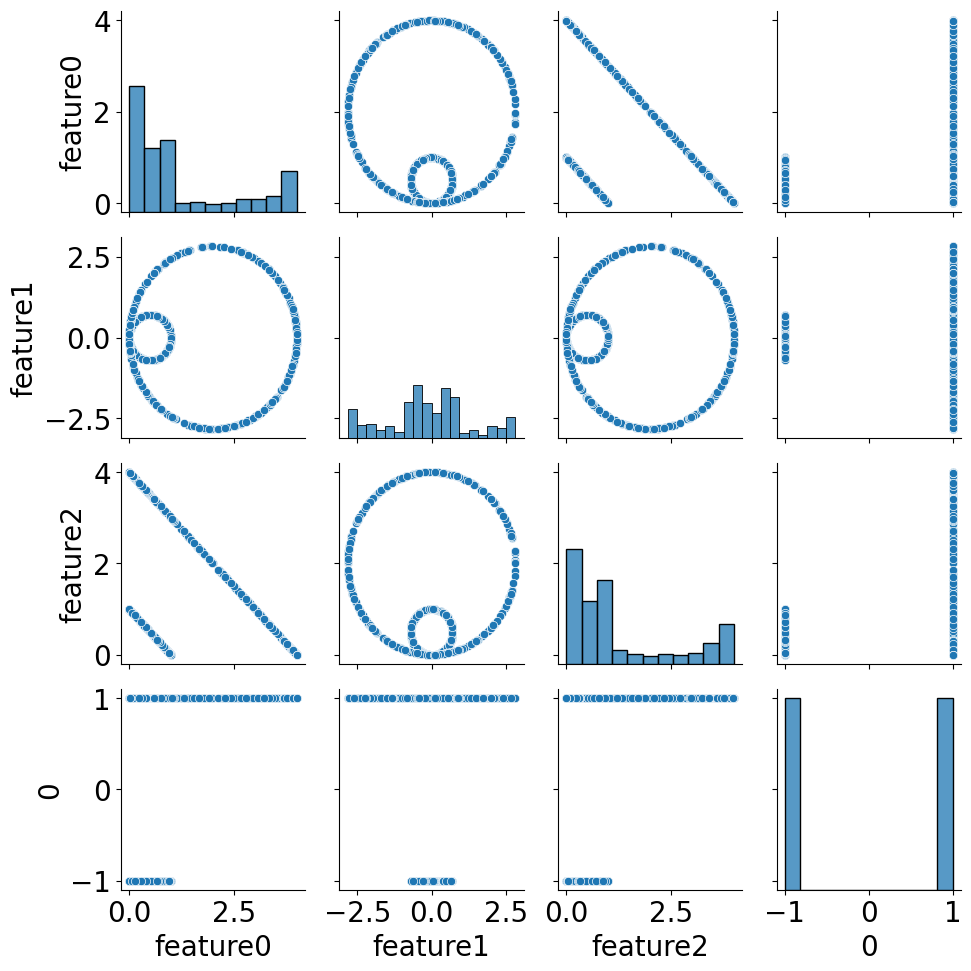

In [519]:
import seaborn as sns
sns.pairplot(z);

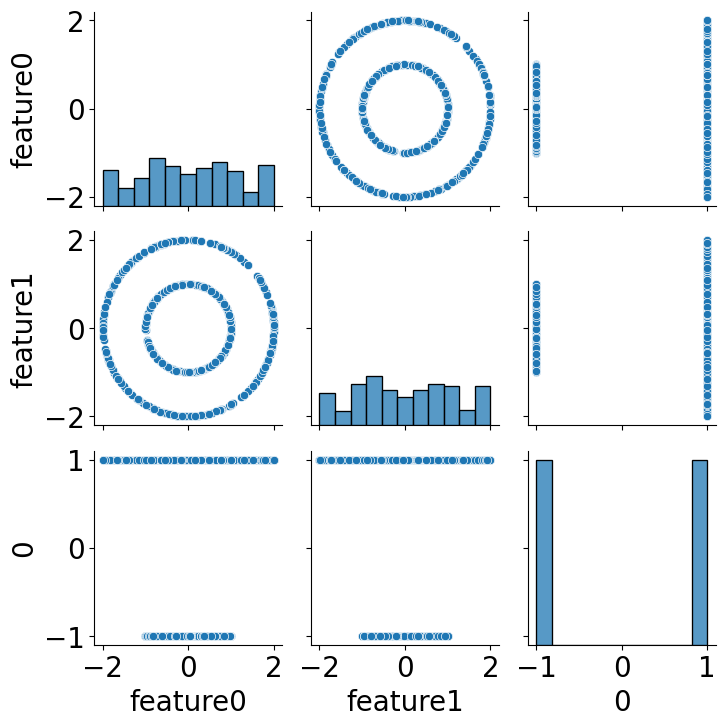

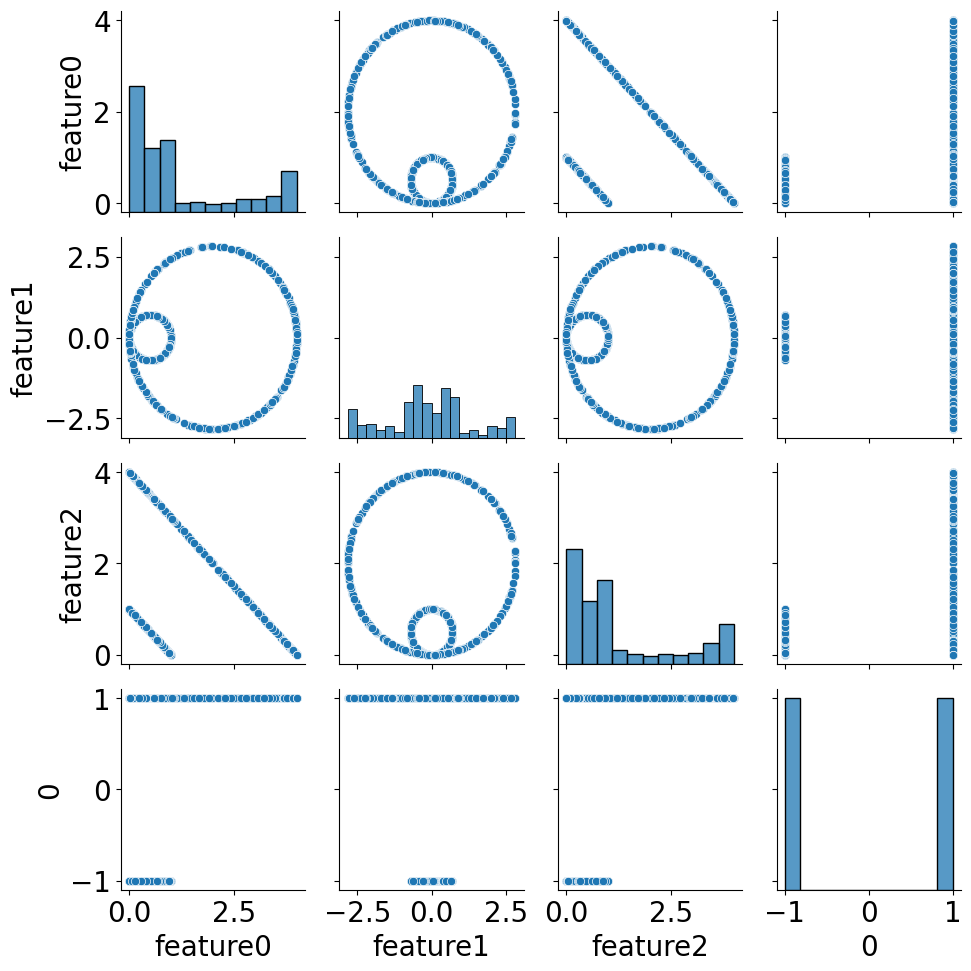

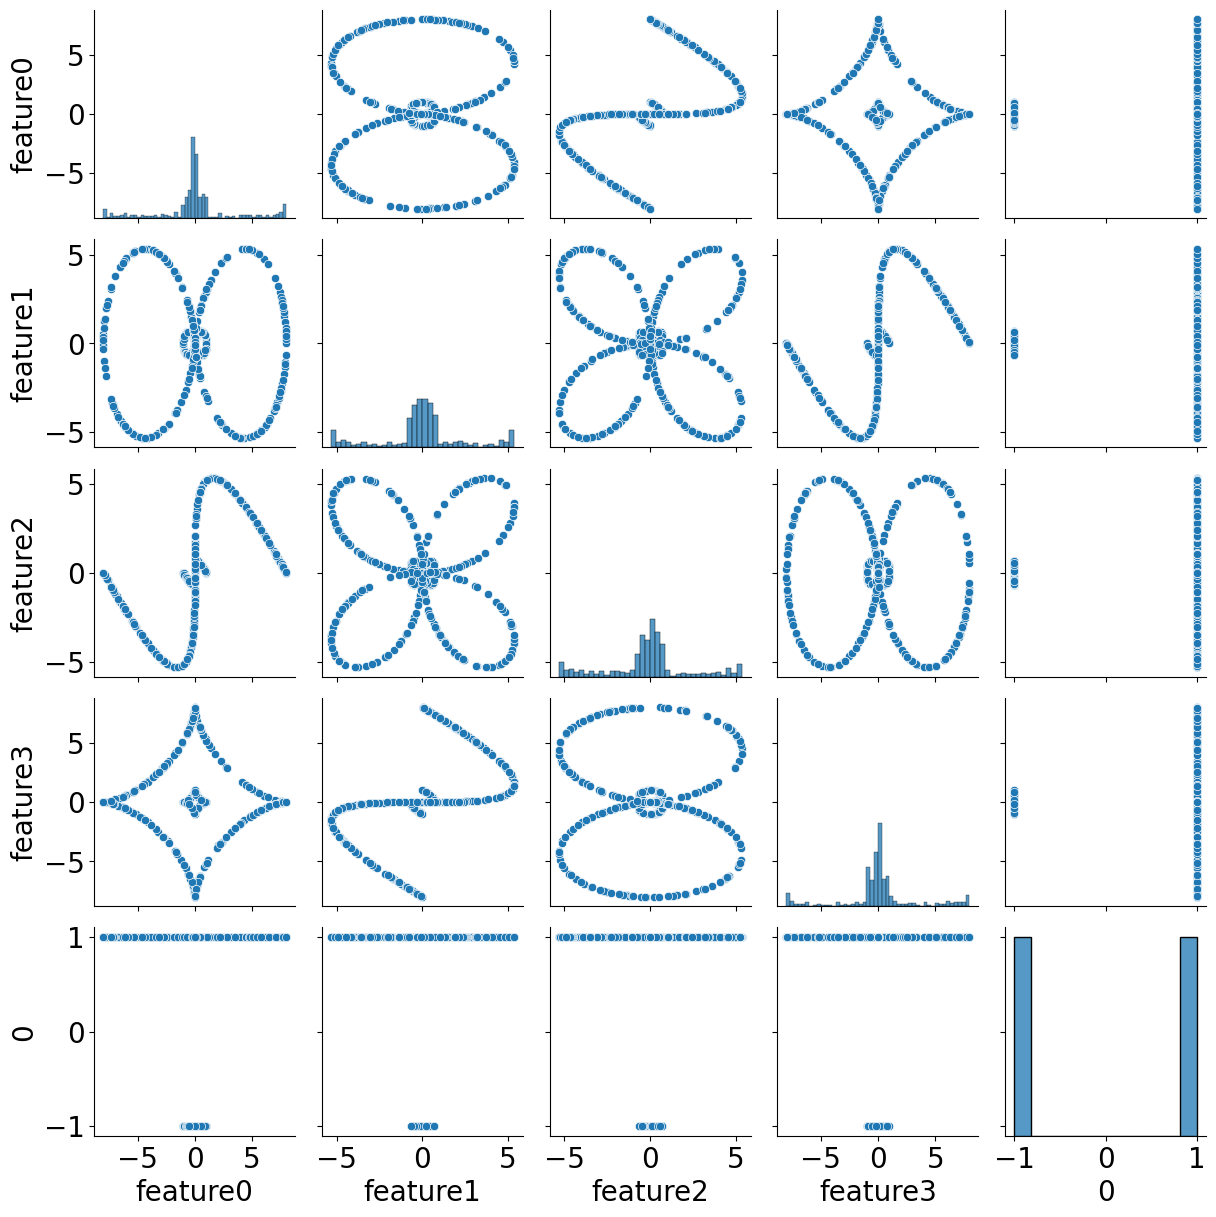

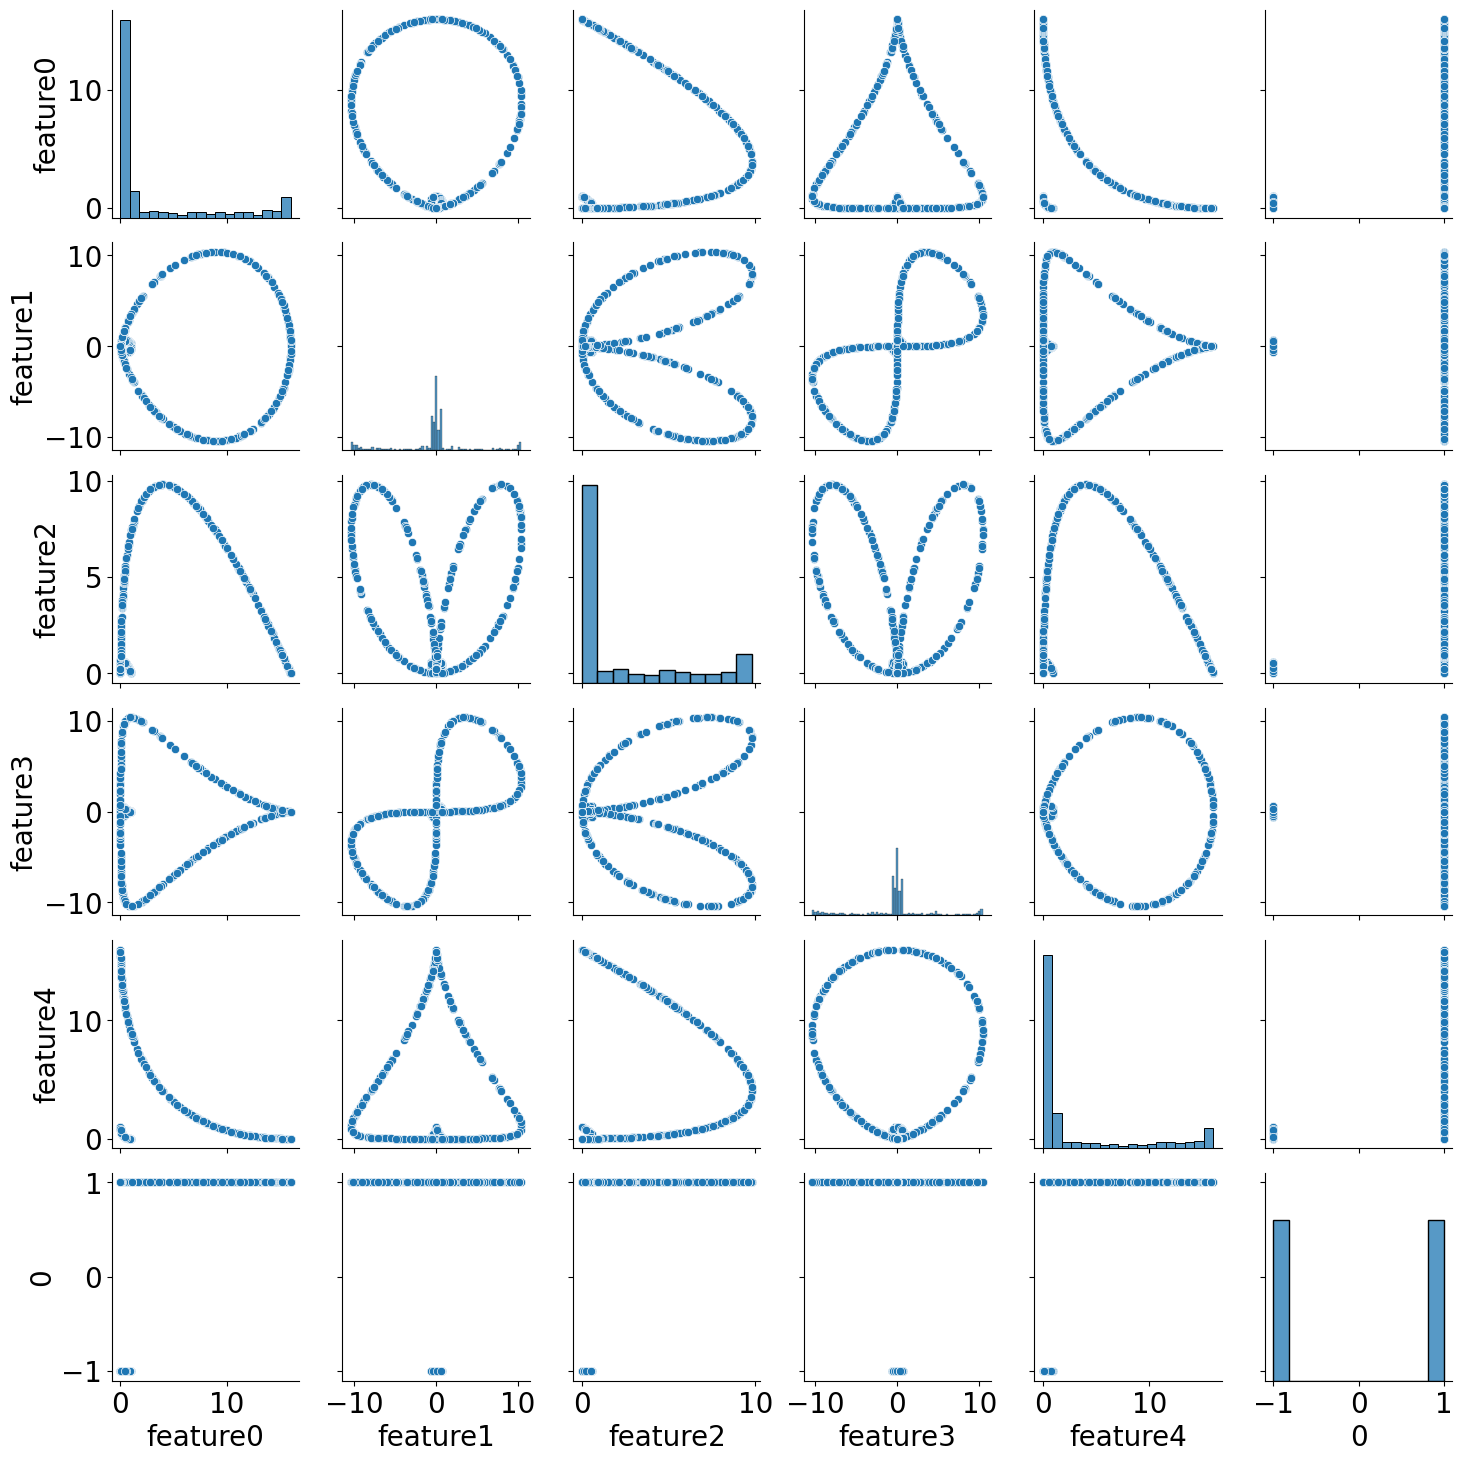

In [520]:
# Visualize 1 to 4 dimensions

for d in range(1,5):
    columns = ['feature'+str(i) for i in range(d+1)]
    z = pd.DataFrame(poly_feature(X,d), columns=columns)
    y = pd.DataFrame(y).rename(columns={'0':'class'})
    z = pd.concat([z,y],axis=1)

    sns.pairplot(z);